<a href="https://colab.research.google.com/github/Adhiraj1998/Mathematics-for-Machine-Learning--Linear-Algebra/blob/master/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading Files

In [31]:
from google.colab import files
uploaded=files.upload()
  

Saving item_categories.csv to item_categories (3).csv


In [32]:
uploaded1=files.upload()

In [3]:
uploaded2=files.upload()

Saving sales_train_v2.csv to sales_train_v2.csv


In [4]:
uploaded3=files.upload()

Saving sample_submission.csv to sample_submission.csv


In [5]:
uploaded4=files.upload()

Saving shops.csv to shops (1).csv


In [7]:
uploaded5=files.upload()

Saving test.csv to test.csv


# Creating the Framework

Here, we generate pandas frameworks for the required csv files that have been uploaded. By doing that, it is easier to access datapoints for analysis and also to view the data in the csv files. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_df = pd.read_csv('sales_train_v2.csv')
items_df = pd.read_csv('items.csv')
test_df = pd.read_csv('test.csv')

In [35]:
print(train_df.shape, test_df.shape)

(2935849, 6) (214200, 3)


In [36]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [0]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%d.%m.%Y')

In [0]:
dataset = train_df.pivot_table(index=['item_id', 'shop_id'],values=['item_cnt_day'], columns='date_block_num', fill_value=0)

In [14]:
dataset = dataset.reset_index()
dataset.head()

item_id shop_id item_cnt_day            ...                         
date_block_num                            0    1    2  ...   29   30   31   32   33
0                    0      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
1                    1      55          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
2                    2      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
3                    3      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
4                    4      54          0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 36 columns]

In [15]:
dataset = pd.merge(test_df, dataset, on=['item_id', 'shop_id'], how='left')
dataset = dataset.fillna(0)
dataset.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
dataset = dataset.drop(['shop_id', 'item_id', 'ID'], axis=1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating the submission framework. After predictions take place by the Deep Learning model (LSTM), predictions shall be stored in the following dataframe, with 2142200 entires.

In [17]:
X_train = np.expand_dims(dataset.values[:, :-1], axis=2)
y_train = dataset.values[:, -1:]

X_test = np.expand_dims(dataset.values[:, 1:], axis=2)
print(X_train.shape, y_train.shape, X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


# LSTM Model Creation and Analysis

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=64, input_shape=(33, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='Nadam',
              metrics=['mean_squared_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=10)

Epoch 1/10
214200/214200 [==============================] - 47s 218us/step - loss: 1.3626 - mean_squared_error: 1.3626
Epoch 2/10
214200/214200 [==============================] - 46s 215us/step - loss: 1.3627 - mean_squared_error: 1.3627
Epoch 3/10
214200/214200 [==============================] - 46s 213us/step - loss: 1.3616 - mean_squared_error: 1.3616
Epoch 4/10
214200/214200 [==============================] - 46s 214us/step - loss: 1.3502 - mean_squared_error: 1.3502
Epoch 5/10
214200/214200 [==============================] - 46s 214us/step - loss: 1.3841 - mean_squared_error: 1.3841
Epoch 6/10
214200/214200 [==============================] - 46s 214us/step - loss: 1.3554 - mean_squared_error: 1.3554
Epoch 7/10
214200/214200 [==============================] - 46s 214us/step - loss: 1.3456 - mean_squared_error: 1.3456
Epoch 8/10
214200/214200 [==============================] - 46s 214us/step - loss: 1.3444 - mean_squared_error: 1.3444
Epoch 9/10
214200/214200 [======================

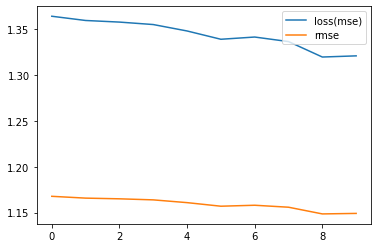

In [21]:
plt.plot(history.history['loss'], label= 'loss(mse)')
plt.plot(np.sqrt(history.history['mean_squared_error']), label= 'rmse')
plt.legend(loc=1)

The following code is used to make a prediction for the next month after the conclusion of the prevalent dataset (October 2015). The precitions by the LSTM model will generate a csv file with 214200 prediction rows. 

In [0]:
LSTM_prediction = model.predict(X_test)
LSTM_prediction = LSTM_prediction.clip(0, 20)
submission = pd.DataFrame({'ID': test_df['ID'], 'item_cnt_month': LSTM_prediction.ravel()})
submission.to_csv('submission.csv',index=False)

In [0]:
files.download('submission.csv')

# Mounting Google Drive in the Virtual Machine

If you are implementing this model on Google Colaboratory, you made need to mount your Google Drive in the runtime's Virtual Machine. I have executed the following code for the ease of usability by other users. 
You may find the following code snippets at https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [27]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.
